## Popularity-Based Filtering

### Load the data

In [1]:
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pandas.read_csv("movies.csv")
credits = pandas.read_csv("credits.csv")
ratings = pandas.read_csv("ratings.csv")

In [3]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# Plot distribution of ratings

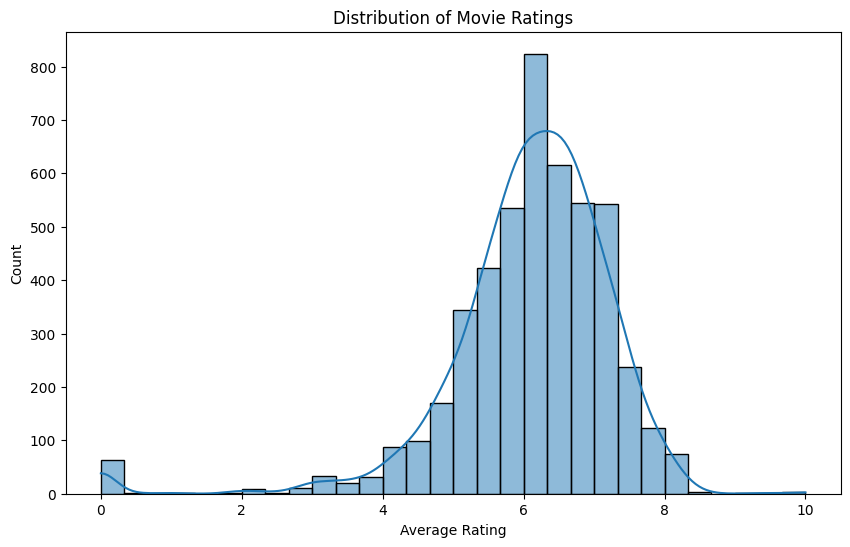

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

# Plot vote count distribution

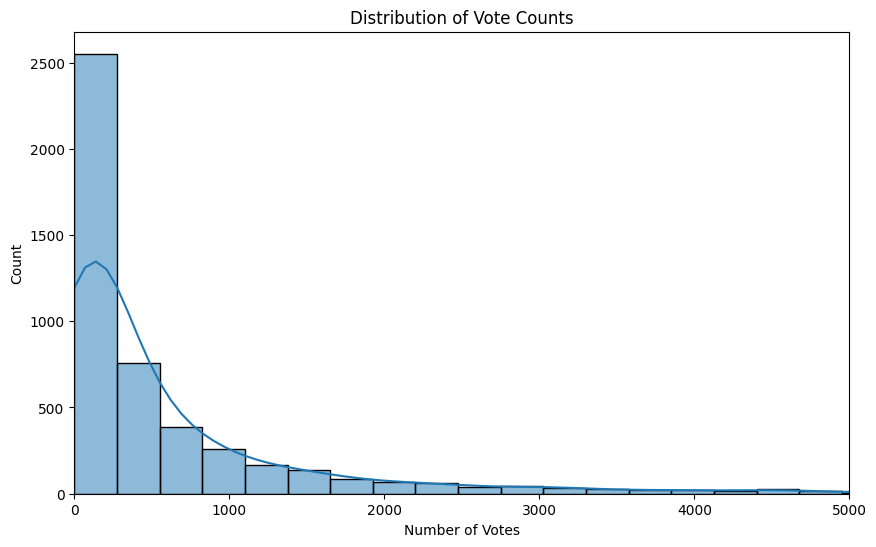

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_count'], bins=50, kde=True)
plt.title('Distribution of Vote Counts')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.xlim(0, 5000)  # Limit x-axis for better visualization
plt.show()

### Calculate a weighted rating

WR = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 

v - number of votes for a movie

m - minimum number of votes required

R - average rating of the movie

C - average rating across all movies

In [8]:
m = movies["vote_count"].quantile(0.9)
m

1838.4000000000015

In [9]:
C = movies["vote_average"].mean()
C

6.092171559442016

WR = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 

In [10]:
movies_filtered = movies.copy().loc[movies["vote_count"] >= m]
movies_filtered

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-01,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Live or die. Make your choice.,Saw,7.2,2184
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",NaN,500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1992-09-02,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every dog has his day.,Reservoir Dogs,8.0,3697
4302,1200000,"[{""id"": 37, ""name"": ""Western""}]","http://www.mgm.com/#/our-titles/766/The-Good,-...",429,"[{""id"": 801, ""name"": ""

In [11]:
def weighted_rating(df, m=m, C=C):
    R = df["vote_average"]
    v = df["vote_count"]
    wr = ((v / v+m) * R) + (m / (v+m) * C)
    return wr

In [12]:
movies_filtered["weighted_rating"] = movies_filtered.apply(weighted_rating, axis=1)
movies_filtered

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,weighted_rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,13244.501200
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12693.626983
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,11589.996513
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,13980.463341
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,11223.166531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...",...,2004-10-01,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Live or die. Make your choice.,Saw,7.2,2184,13246.464370
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",NaN,500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...",...,1992-09-02,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every dog has his day.,Reservoir Dogs,8.0,3697,14717.223313
4302,1200000,"[{""id"": 37, ""name"": ""Western""}]","http://www.mgm.com/#/our-titles/766/The-Good,-...",429,"[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",it,"Il buono, il brutto, il cattivo",While the Civil War rages between the Union an...,88.377076,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,1966-12-23,6000000,161.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}]",Released,For three men

In [13]:
import os
os.makedirs('plots/popularity', exist_ok=True)

# Plot comparison of ratings

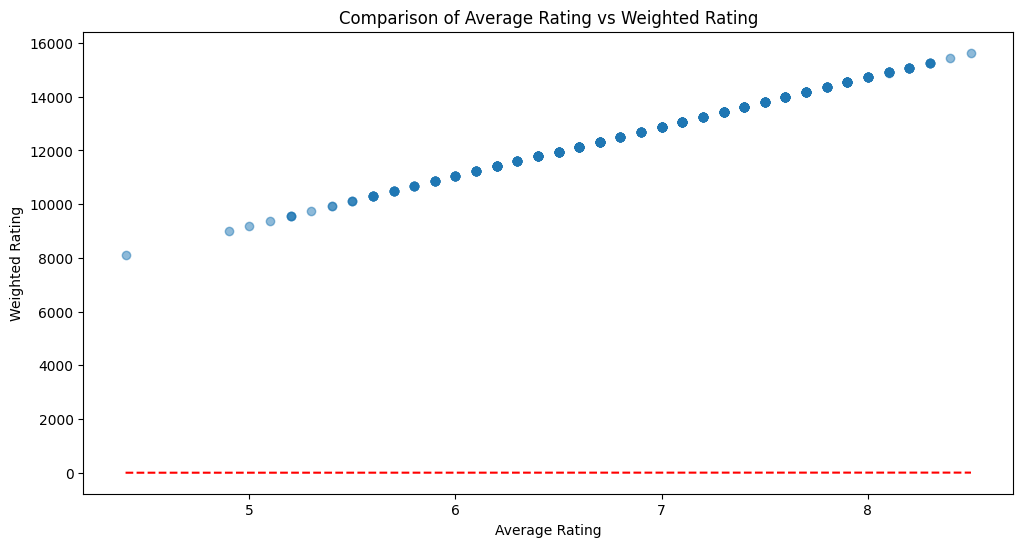

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(movies_filtered['vote_average'], movies_filtered['weighted_rating'], alpha=0.5)
plt.plot([movies_filtered['vote_average'].min(), movies_filtered['vote_average'].max()], 
         [movies_filtered['vote_average'].min(), movies_filtered['vote_average'].max()], 
         'r--')
title = 'Comparison of Average Rating vs Weighted Rating'
plt.title(title)
plt.xlabel('Average Rating')
plt.ylabel('Weighted Rating')
plt.savefig(f'plots/popularity/{title.lower().replace(" ", "_")}.png', bbox_inches='tight')
plt.show()

# Plot top movies by weighted rating

C:\Users\Mihir Patil\AppData\Local\Temp\ipykernel_8808\2593392870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weighted_rating', y='title', data=top_movies, palette='viridis')


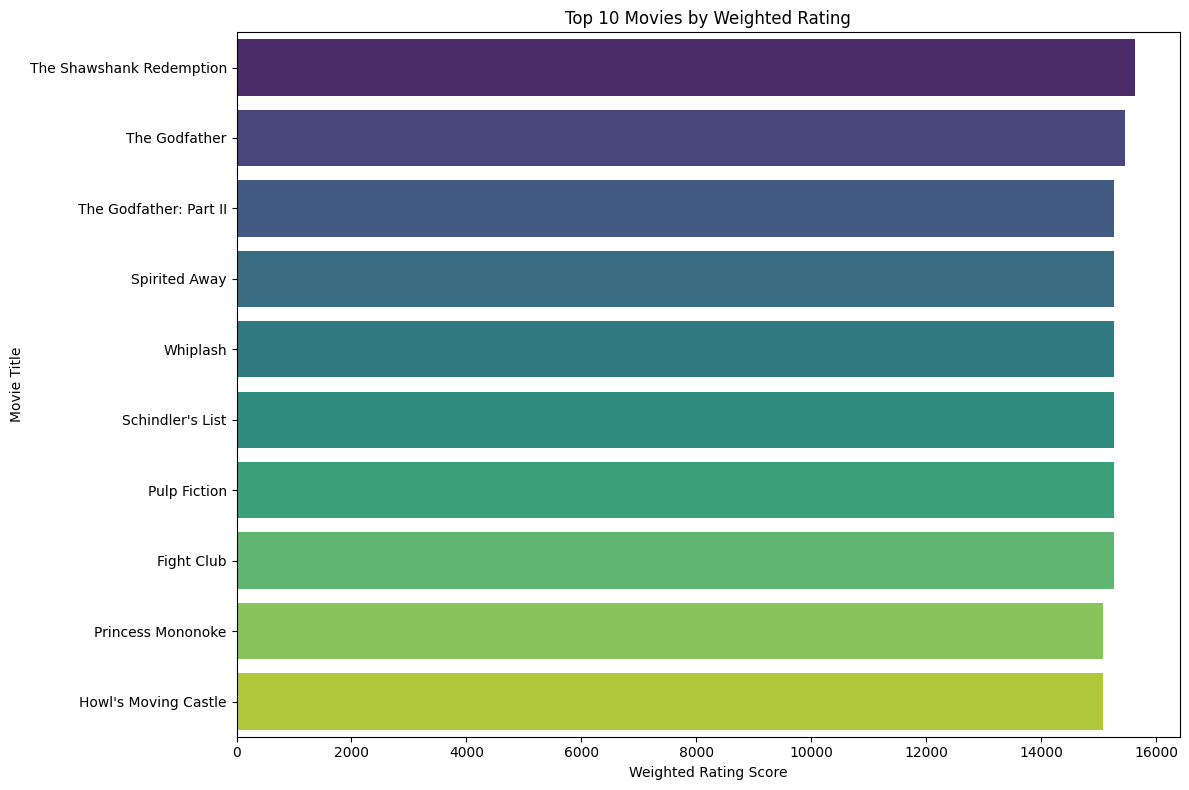

In [15]:
top_movies = movies_filtered.sort_values("weighted_rating", ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='weighted_rating', y='title', data=top_movies, palette='viridis')
title = 'Top 10 Movies by Weighted Rating'
plt.title(title)
plt.xlabel('Weighted Rating Score')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.savefig(f'plots/popularity/{title.lower().replace(" ", "_")}.png', bbox_inches='tight')
plt.show()

# Movie budget vs popularity

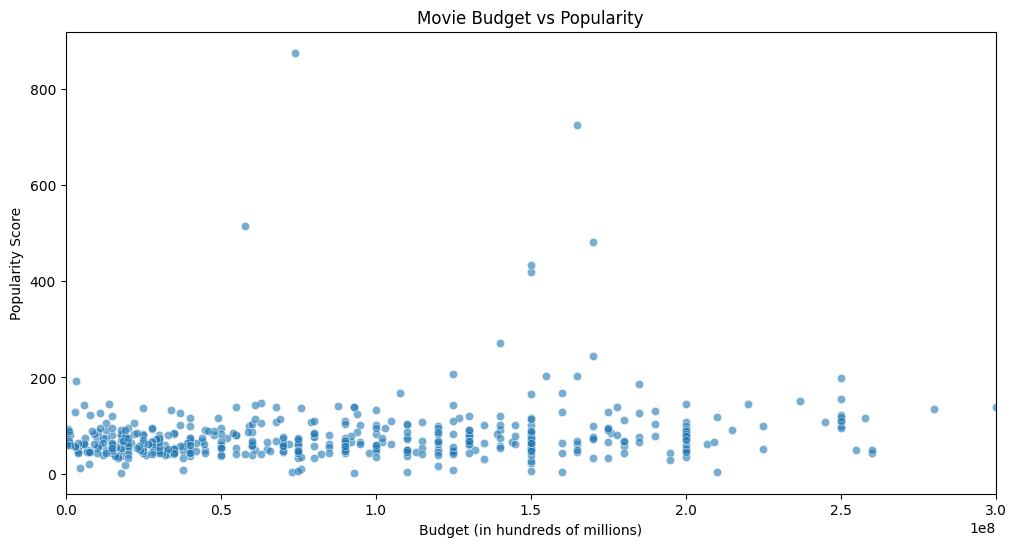

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget', y='popularity', data=movies_filtered, alpha=0.6)
title = 'Movie Budget vs Popularity'
plt.title(title)
plt.xlabel('Budget (in hundreds of millions)')
plt.ylabel('Popularity Score')
plt.xlim(0, 3e8)  # Limit x-axis for better visualization
plt.savefig(f'plots/popularity/{title.lower().replace(" ", "_")}.png', bbox_inches='tight')
plt.show()

# Plot budget vs weighted rating

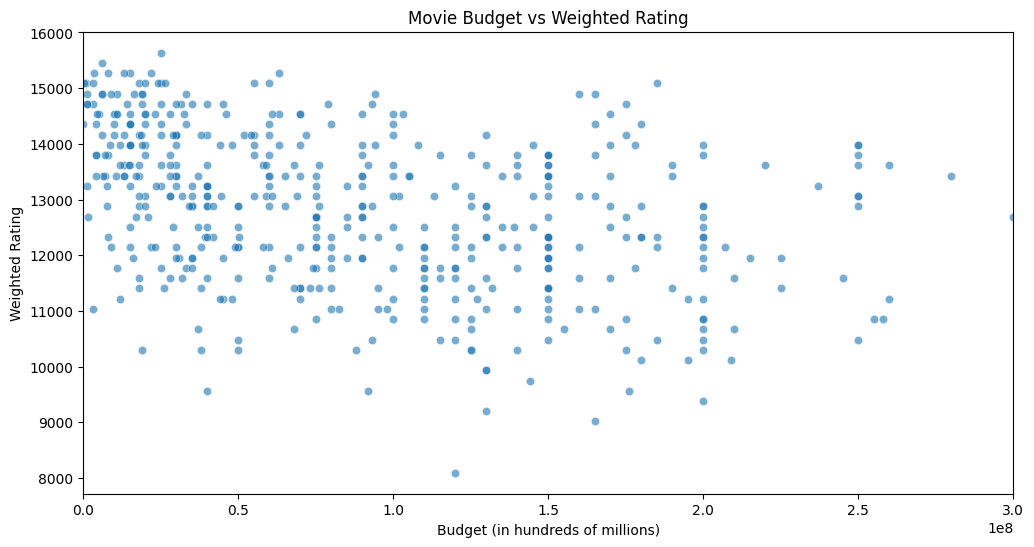

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget', y='weighted_rating', data=movies_filtered, alpha=0.6)
title = 'Movie Budget vs Weighted Rating'
plt.title(title)
plt.xlabel('Budget (in hundreds of millions)')
plt.ylabel('Weighted Rating')
plt.xlim(0, 3e8)  # Limit x-axis for better visualization
plt.savefig(f'plots/popularity/{title.lower().replace(" ", "_")}.png', bbox_inches='tight')
plt.show()

# Movie runtime distribution

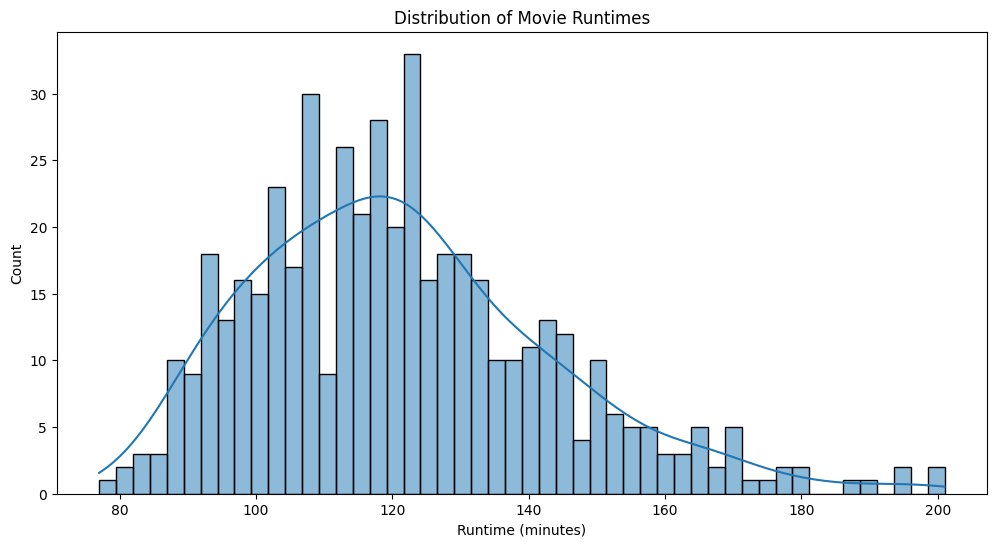

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(movies_filtered['runtime'].dropna(), bins=50, kde=True)
title = 'Distribution of Movie Runtimes'
plt.title(title)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.savefig(f'plots/popularity/{title.lower().replace(" ", "_")}.png', bbox_inches='tight')
plt.show()

# Movie runtime vs weighted rating

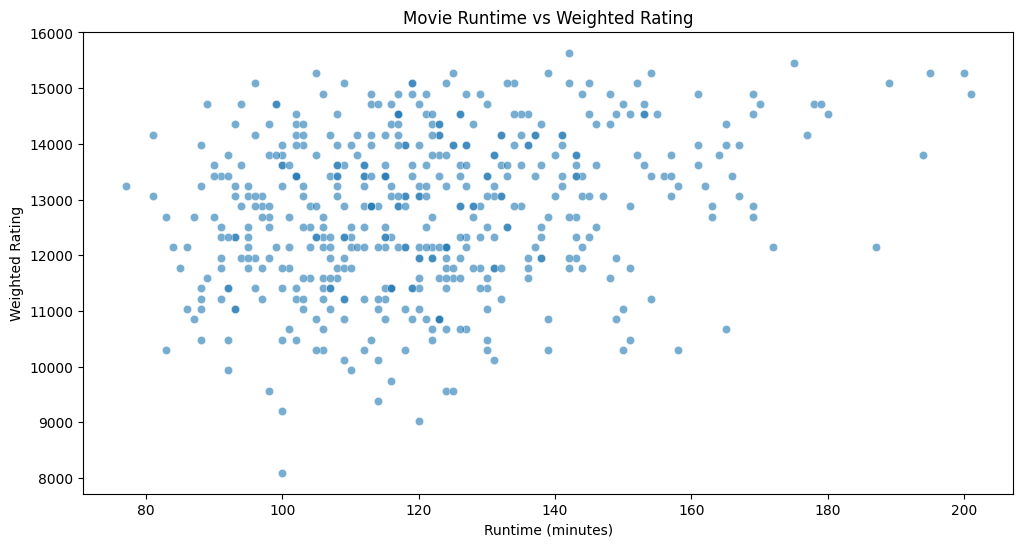

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='runtime', y='weighted_rating', data=movies_filtered, alpha=0.6)
title = 'Movie Runtime vs Weighted Rating'
plt.title(title)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Weighted Rating')
plt.savefig(f'plots/popularity/{title.lower().replace(" ", "_")}.png', bbox_inches='tight')
plt.show()

In [20]:
movies_filtered.sort_values("weighted_rating", ascending=False)[["title", "weighted_rating"]].head(10)

,title,weighted_rating
1881,The Shawshank Redemption,15636.015145
3337,The Godfather,15452.408618
2731,The Godfather: Part II,15269.183637
2294,Spirited Away,15268.992360
3865,Whiplash,15268.858331
1818,Schindler's List,15268.835976
3232,Pulp Fiction,15268.110923
662,Fight Club,15268.015418
2247,Princess Mononoke,15086.010823
1987,Howl's Moving Castle,15086.004701
